In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import matplotlib.pyplot as plt
import torch
import nibabel
import data.constants as constants
import nilearn.masking as masking
import numpy as np
import pandas as pd
from data import ward_tree
import nibabel
from nilearn.image import load_img, resample_img, crop_img, threshold_img, math_img
import nilearn.masking as masking
from nilearn import plotting
import itertools
mask = nibabel.load("/data/hcp/hcp_mask.nii.gz")
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# archi_args = torch.load("/data/brain_/gcn/outputs/multi_run/fgl/exp/args.checkpoint")

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/site-packages/nilearn/plot

In [113]:
chkfn = "/data/brain_/gcn/outputs/multi_run/fgl/exp_nfdim1/outer_split0/best.checkpoint"
fgl1chk = torch.load(chkfn, map_location='cpu')

chkfn = "/data/brain_/gcn/outputs/multi_run/fgl_213_max_tree/exp_fgl213/outer_split0/best.checkpoint"
fgl213chk = torch.load(chkfn, map_location='cpu')
# chkfn = "/data/brain_/gcn/outputs/multi_run/fgl/exp_nfdim0/outer_split0/last.checkpoint"
# fgl0chk = torch.load(chkfn, map_location='cpu')

chkfn = "/data/brain_/gcn/outputs/multi_run/fc/random_outer_baseline/outer_split0/best.checkpoint"
fcchk = torch.load(chkfn, map_location='cpu')
chkfn = "/data/brain_/gcn/outputs/multi_run/fc/baseline/outer_split0/test_metrics_per_epoch.checkpoint"
fcbmet = torch.load(chkfn, map_location='cpu')

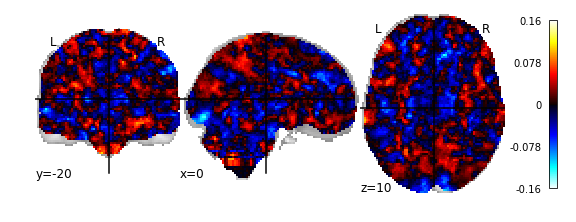

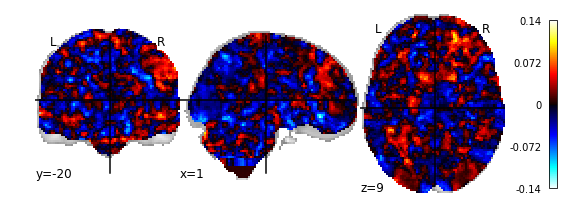

In [61]:
plotting.plot_stat_map(masking.unmask(fcchk['model']['net.0.weight_v'][26, :].numpy(), mask))
plotting.plot_stat_map(masking.unmask(fcchk['model']['net.0.weight_v'][29, :].numpy(), mask))

Confusion matrix, without normalization
[[6 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 6 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0

NameError: name 'itertools' is not defined

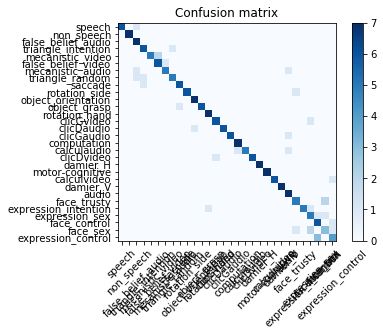

In [53]:
plot_confusion_matrix(fcbmet[-1]['cm'], [archi_args.meta['i2c'][i] for i in range(len(archi_args.meta['i2c']))])


In [52]:
[archi_args.meta['i2c'][i] for i in range(len(archi_args.meta['i2c']))]

['speech',
 'non_speech',
 'false_belief_audio',
 'triangle_intention',
 'mecanistic_video',
 'false_belief_video',
 'mecanistic_audio',
 'triangle_random',
 'saccade',
 'rotation_side',
 'object_orientation',
 'object_grasp',
 'rotation_hand',
 'clicGvideo',
 'clicDaudio',
 'clicGaudio',
 'computation',
 'calculaudio',
 'clicDvideo',
 'damier_H',
 'motor-cognitive',
 'calculvideo',
 'damier_V',
 'audio',
 'face_trusty',
 'expression_intention',
 'expression_sex',
 'face_control',
 'face_sex',
 'expression_control']

In [129]:
fgl213chk['model']['downsample1.bias'].

torch.Size([1, 64, 1])

In [32]:
outputs_dir = ["/data/brain_/gcn/outputs/multi_run"]
models = ["fc", "lin", "conv", "cc", "fgl_132_sum_tree" , "fgl_213_sum_tree", "smallfgl_213_sum_tree", "smallerfgl_213_sum_tree", "smaller2fgl_213_sum_tree"] # , "randomfgl_213_sum_packed1.0"] # , "rfgl"]
datasets = ["archi0", "la5c0", "hcp0"]
for ds, od, mt  in itertools.product(datasets, outputs_dir, models):
    chk = torch.load(os.path.join(od, mt, ds, "last_metrics.checkpoint"))
    accs = []
    loss = []
    for i in range(10):
        tochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))
        ochk = torch.load(os.path.join(od, mt, ds, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        accs.append(ochk[-1]["accuracy"])
        loss.append(tochk[-1]["loss"])
#     print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))
    print("{} {}: mean acc={:.4f} std={:.4f}".format(ds[:-1], mt, chk['accuracy'], np.std(accs)))

archi fc: mean acc=0.8100 std=0.0255
archi lin: mean acc=0.8272 std=0.0133
archi conv: mean acc=0.8423 std=0.0203
archi cc: mean acc=0.8396 std=0.0196
archi fgl_132_sum_tree: mean acc=0.8616 std=0.0258
archi fgl_213_sum_tree: mean acc=0.8696 std=0.0219
archi smallfgl_213_sum_tree: mean acc=0.8709 std=0.0240
archi smallerfgl_213_sum_tree: mean acc=0.8707 std=0.0202
archi smaller2fgl_213_sum_tree: mean acc=0.8619 std=0.0183
la5c fc: mean acc=0.6112 std=0.0158
la5c lin: mean acc=0.6086 std=0.0201
la5c conv: mean acc=0.6199 std=0.0162
la5c cc: mean acc=0.6204 std=0.0137
la5c fgl_132_sum_tree: mean acc=0.6203 std=0.0187
la5c fgl_213_sum_tree: mean acc=0.6396 std=0.0211
la5c smallfgl_213_sum_tree: mean acc=0.6484 std=0.0250
la5c smallerfgl_213_sum_tree: mean acc=0.6424 std=0.0238
la5c smaller2fgl_213_sum_tree: mean acc=0.6362 std=0.0171
hcp fc: mean acc=0.9170 std=0.0057
hcp lin: mean acc=0.9216 std=0.0046
hcp conv: mean acc=0.9138 std=0.0037
hcp cc: mean acc=0.9152 std=0.0038
hcp fgl_132_su

In [28]:
(0.8616 - 0.84) / (0.02 / np.sqrt(10))

3.4152598729818595

# Junk and experimentation follow

In [66]:
ds = "archi0"
models = ["fgl_213_sum_tree", "conv"]  # , "fc", "lin", "cc"]
chks = {}
prefix = "test"
for md in models:
    chks[md] = torch.load("/data/brain_/gcn/outputs/multi_run/{}/{}/outer_split0/{}_metrics_per_epoch.checkpoint".format(md, ds, prefix))

conv: end accuracy=0.8130434782608695
fgl_213_sum_tree: end accuracy=0.8376811594202899


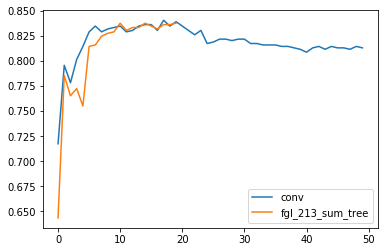

In [67]:
metric = "accuracy"
for k, chk in chks.items():
    plt.plot([chk[i][metric] for i in range(len(chk))], label=k)
    print("{}: end {}={}".format(k, metric, chk[-1][metric]))
plt.legend(loc='best')

In [30]:
outputs_dir = ["/data/brain_/transfer/outputs/multi_run"]
models = ["lin", "smallerfgl_213_sum_tree"] # "lin_", "randomfgl_213_sum_packed1.0"] # , "rfgl"]
run_ids = ["run0_drp"] # , "run0_drp"]
for od, mt, rd  in itertools.product(outputs_dir, models, run_ids):
    chk = torch.load(os.path.join(od, mt, rd, "last_metrics.checkpoint"))
    accs = {study: [] for study in chk.keys()}
    losses = {study: [] for study in chk.keys()}
    for i in range(10):
        ochk = torch.load(os.path.join(od, mt, rd, "outer_split{}".format(i), "test_metrics_per_epoch.checkpoint"))
        tochk = torch.load(os.path.join(od, mt, rd, "outer_split{}".format(i), "train_metrics_per_epoch.checkpoint"))

        for study in accs.keys():
            accs[study].append(ochk[-1][study]["accuracy"])
            losses[study].append(tochk[-1][study]["loss"])
    for study in accs.keys():
#         print("{} {}: mean acc={:.4f} std={:.4f}".format(study, mt, np.mean(accs[study]), np.std(accs[study])))
        print("{} {}: mean acc={:.4f} loss={:.4f} std={:.4f}".format(study, mt, np.mean(accs[study]), np.mean(losses[study]), np.std(accs[study])))

archi lin: mean acc=0.8494 loss=0.0533 std=0.0131
la5c lin: mean acc=0.6089 loss=0.2632 std=0.0222
hcp lin: mean acc=0.9268 loss=0.2943 std=0.0039
archi smallerfgl_213_sum_tree: mean acc=0.8641 loss=0.0232 std=0.0178
la5c smallerfgl_213_sum_tree: mean acc=0.6226 loss=1.1832 std=0.0177
hcp smallerfgl_213_sum_tree: mean acc=0.9271 loss=0.5662 std=0.0047
